# Lasso regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.base import BaseEstimator
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

random_seed = 42

Coordinate descent

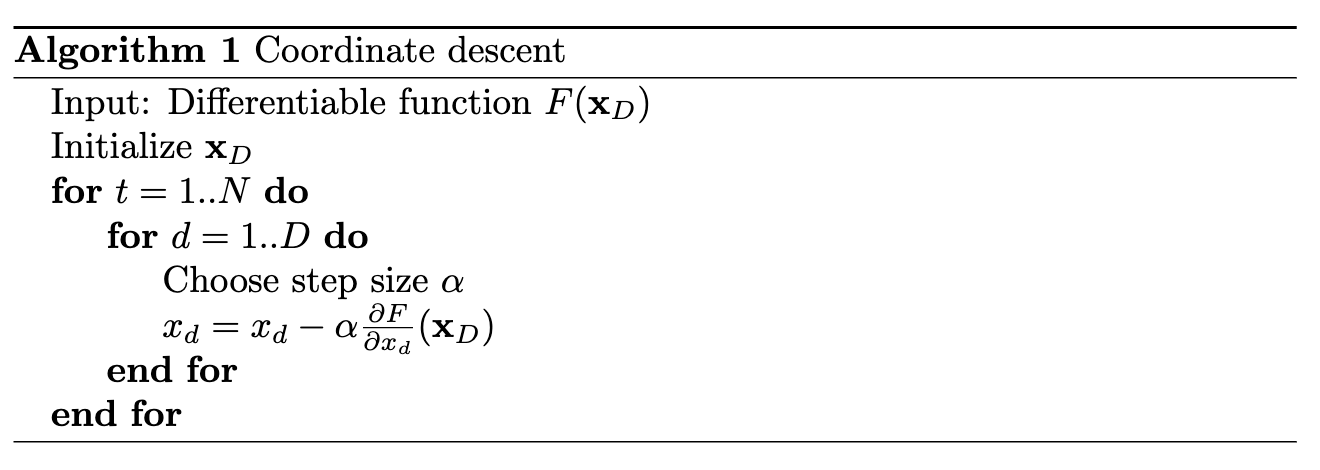

LASSO regression.

In [ ]:
#@title
X, y, coef = make_regression(n_samples=1000, n_features=6, n_informative=3,
                             noise=20, bias=100, coef=True, random_state=random_seed)

Finding the optimal penalty coefficient $\lambda$.

In [ ]:
#@title

np.random.seed(seed=random_seed)

def fx(x):
  y = x + 5 * x**2 - 1 * x**3 + 5 * np.random.randn(*x.shape)
  return y.ravel()

X, _ = make_regression(n_samples=1000, n_features=1, random_state=random_seed)
y = fx(X)

Reduction of overfitting

In [ ]:
#@title

np.random.seed(seed=random_seed)

def fx(x):
  y = x + 5 * x**2 - 1 * x**3 + 5 * np.random.randn(*x.shape)
  return y.ravel()

X_train, _ = make_regression(n_samples=15, n_features=1, random_state=random_seed)
y_train = fx(X_train)

X_test, _ = make_regression(n_samples=15, n_features=1, random_state=random_seed+1)
y_test = fx(X_test)

Lasso as a preprocessing step

In [ ]:
#@title
X, y, true_coef = make_regression(n_samples=1000, n_features=15, n_informative=3,
                             noise=20, bias=100, coef=True, random_state=random_seed)

Comparing LASSO and Ridge.

In [ ]:
#@title
def fx(x1, x2):
  return 5 * x1 ** 2 + 3 * x1 + 5 * x2 ** 2 + 20 * x2 - 6 * x1 * x2

xx1 = np.linspace(-4, 1, 100)
xx2 = np.linspace(-4, 1, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
yy = fx(xx1, xx2)

r = np.linspace(0.98, 1, 100)
theta = np.linspace(0, 2*np.pi, 100)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)

zz = fx(X, Y)
min_zz = zz.min()

Z = np.full((100, 100), min_zz)

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]])

fig.add_trace(go.Surface(x=X, y=Y, z=Z), row=1, col=1)

fig.update_traces(showscale=False)
fig.add_trace(go.Surface(x=xx1, y=xx2, z=yy), row=1, col=1)

xx1 = np.linspace(-4, 1, 100)
xx2 = np.linspace(-4, 1, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)
yy = fx(xx1, xx2)

c = 1.0
X = np.linspace(0, c, 10)
X = np.concatenate((X, X, -X, X - c))

Y = np.linspace(0, c, 10)
Y = np.concatenate((Y - c, c - Y, c - Y, -Y))

zz = fx(X, Y)
min_zz = zz.min() - 0.1

Z = np.repeat(min_zz, 40)

fig.add_trace(go.Surface(x=xx1, y=xx2, z=yy), row=1, col=2)
fig.update_traces(showscale=False)

fig.add_scatter3d(x=[0,], y=[0,], z=[min_zz,], marker=dict(size=3, color='orange'), row=1, col=2)
fig.add_trace(go.Scatter3d(x=X, y=Y, z=Z, line=dict(width=3), marker=dict(size=1)), row=1, col=2)

fig.add_scatter3d(x=[0,], y=[0,], z=[min_zz,], marker=dict(size=3, color='red'))

fig.update_traces(showlegend=False)

fig.update_layout(width=1500, height=800, title=dict(text=r"Ridge regression (L2) vs Lasso regression (L1)", x=0.5, font=dict(size=24)))
fig.show()